<a href="https://colab.research.google.com/github/Manuel-FA/Machine_Learning/blob/main/Credit%20risk%20analysis%20-%20Dataset_1%20-%20XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#000080B">**ABSTRACT**</font>

*   A classification model was made to predict the probability of credit default.
*   Model: XGBClassifier
*   Libraries used: Numpy, Pandas, MatPlotLib, Seaborn, Scikitplot and Sklearn

# <font color="#000080B">**1. Introduction**</font>
---



## **1.1. Content**


    1. Introduction
      1.1. Content
      1.2. Problem statement
    2. Project preparation
      2.1. Libraries import
      2.2. Data import
    3. Exploratory data analysis
      3.1. Data information
      3.2. Univariate analysis
      3.3. Bivariate analysis
    4. Data preprocessing
      4.1. Removing redundant variables
      4.2. Filling missing values
      4.3. Encoding categorical features
    5. Modeling
      5.1. Dataset preparation
      5.2. Training and validation
    6. Interpretation of results
      6.1. Metric evaluation
      6.2. ROC curve
      6.3. Important features

## **1.2. Problem statement**

Granting credit to customers is an important area in the financial industry as it enables financial institutions to make informed decisions regarding loan approvals and assess the probability of payment default by credit applicants.

In credit risk analysis, historical datasets are used that contain information about past customers, such as their income, credit history, debt level, employment history, and other relevant factors. These data are used to train machine learning models that can predict the probability of credit default or the repayment capacity of prospective customers.




# <font color="#000080B">**2. Project preparation**</font>

---



## **2.1. Libraries import**

In [ ]:
# data import
from google.colab import files

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scikitplot as skplt

# warnings
import warnings
warnings.filterwarnings('ignore')


## **2.2. Data import**

In [ ]:
uploaded = files.upload()

Saving loan.csv to loan.csv


In [ ]:
df = pd.read_csv("/content/loan.csv")
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


# <font color="#000080B">**3. Exploratory data analysis**</font>
---



Exploratory Data Analysis (EDA) is a fundamental technique in the field of machine learning, used to better understand data and extract useful information from it. The goal of EDA is to discover patterns, trends, and relationships among variables, as well as detect outliers, errors, and potential issues in the data.

## **3.1. Data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

There are many variables that are not relevant to the calculation, such as visible codes or variables that at first glance contain an excess of missing values, therefore you manually select which variables are considered.

In [ ]:
attribs_to_use = [
    'grade',                # assigned loan grade
    'verification_status',  # indicates if the co-borrowers' joint income was verified
    'annual_inc',           # the self-reported annual income
    'loan_amnt',            # the listed amount of the loan applied for by the borrower
    'funded_amnt',          # actual amount funded to loans
    'term',                 # number of payments (month)
    'int_rate',             # interest rate
    'installment',          # monthly payment
    'sub_grade',            # credit rating
    'emp_length',           # number of years of employment
    'home_ownership',       # home ownership status of each borrower
    'loan_status',          # current status of the loan (=target variable)
    'purpose',              # purpose of the loan
    'dti',                  # debt to monthly income ratio
    'delinq_2yrs',          # number of 30+ days past-due incidences for last two years
    'inq_last_6mths',       # number of inquiries in past 6 months
    'total_acc',            # total number of credit lines
    'pub_rec',              # number of derogatory public records
    'revol_bal',            # total credit revolving balance
    'revol_util',           # total revolving utilization rate
    'total_rec_late_fee',   # late fees received to date
    'recoveries',           # post charge off gross recovery
    'last_pymnt_amnt',      # last month payment amount
    'acc_now_delinq',       # number of delinquent accounts
    'total_pymnt'           # total payments received to date
]

df = df[attribs_to_use]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   grade                887379 non-null  object 
 1   verification_status  887379 non-null  object 
 2   annual_inc           887375 non-null  float64
 3   loan_amnt            887379 non-null  float64
 4   funded_amnt          887379 non-null  float64
 5   term                 887379 non-null  object 
 6   int_rate             887379 non-null  float64
 7   installment          887379 non-null  float64
 8   sub_grade            887379 non-null  object 
 9   emp_length           842554 non-null  object 
 10  home_ownership       887379 non-null  object 
 11  loan_status          887379 non-null  object 
 12  purpose              887379 non-null  object 
 13  dti                  887379 non-null  float64
 14  delinq_2yrs          887350 non-null  float64
 15  inq_last_6mths   

In [ ]:
print('Data shape:', df.shape)

print('Number of Duplicates:', len(df[df.duplicated()]))

print('Number of Missing Values:', df.isnull().sum().sum())

print('Count of Features per Data Type:')
df.dtypes.value_counts()

Data shape: (887379, 25)
Number of Duplicates: 0
Number of Missing Values: 45476
Count of Features per Data Type:


float64    17
object      8
dtype: int64

A considerable amount of missing values is observed, a visualization is created to better identify them.

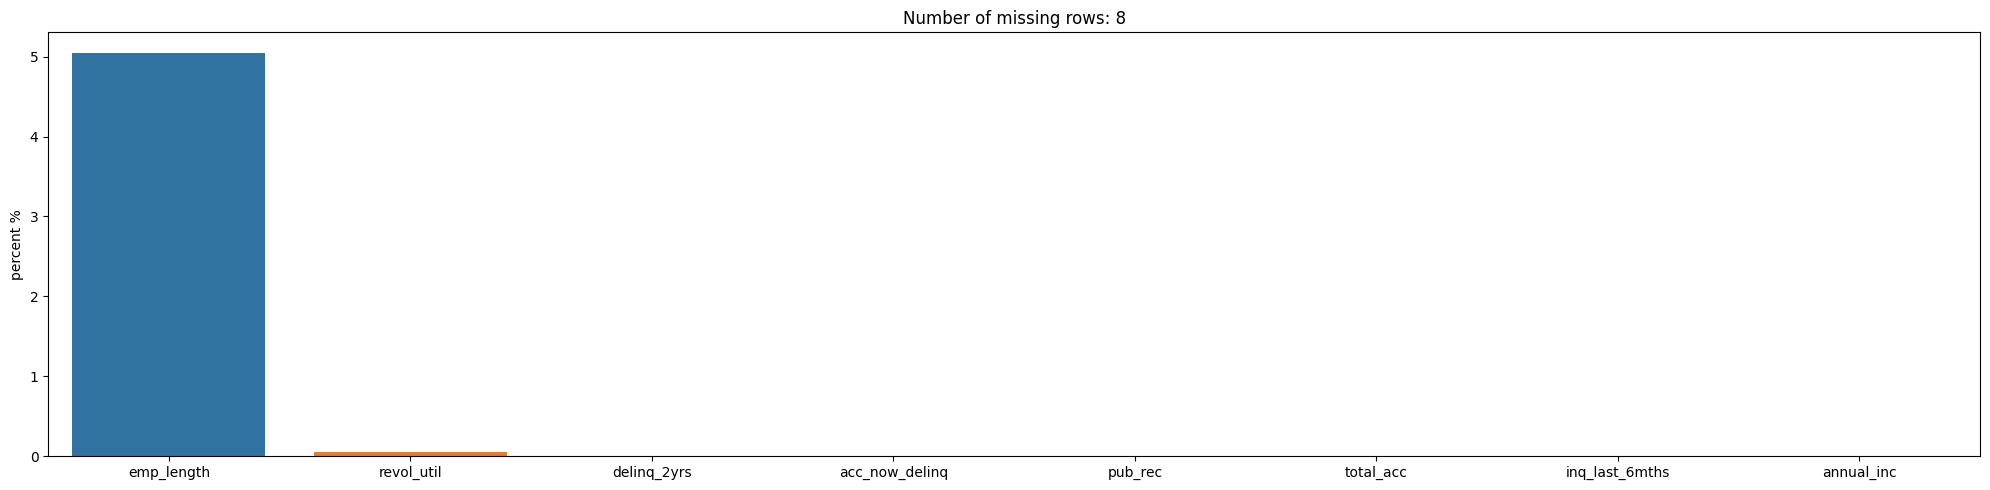

In [ ]:
missing_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing_values['percent %'] = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
missing_values['dtype'] = df.dtypes
missing_values = missing_values[ missing_values[0] > 0 ]
plt.figure(figsize=(20,5))
plt.title('Number of missing rows: ' + str(len(missing_values)))
sns.barplot(x=missing_values.index, y= missing_values['percent %'])
plt.tight_layout()

## **3.2. Univariate analysis**

Study and analysis of a single variable in a data set. The main goal of univariate analysis is to understand the distribution, central tendency, and spread of that variable.

### **3.2.1. Numerical variables**

Numeric variables are a type of variable in statistics and data analysis that represent measurable or quantifiable numeric values. These variables can undergo arithmetic operations and are characterized by having an order and magnitude.

In [ ]:
# numeric variables are selected
numeric_columns = df.select_dtypes(include = ['float64','int64']).columns
print(numeric_columns)
len(numeric_columns)

Index(['annual_inc', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'acc_now_delinq', 'total_pymnt'],
      dtype='object')


17

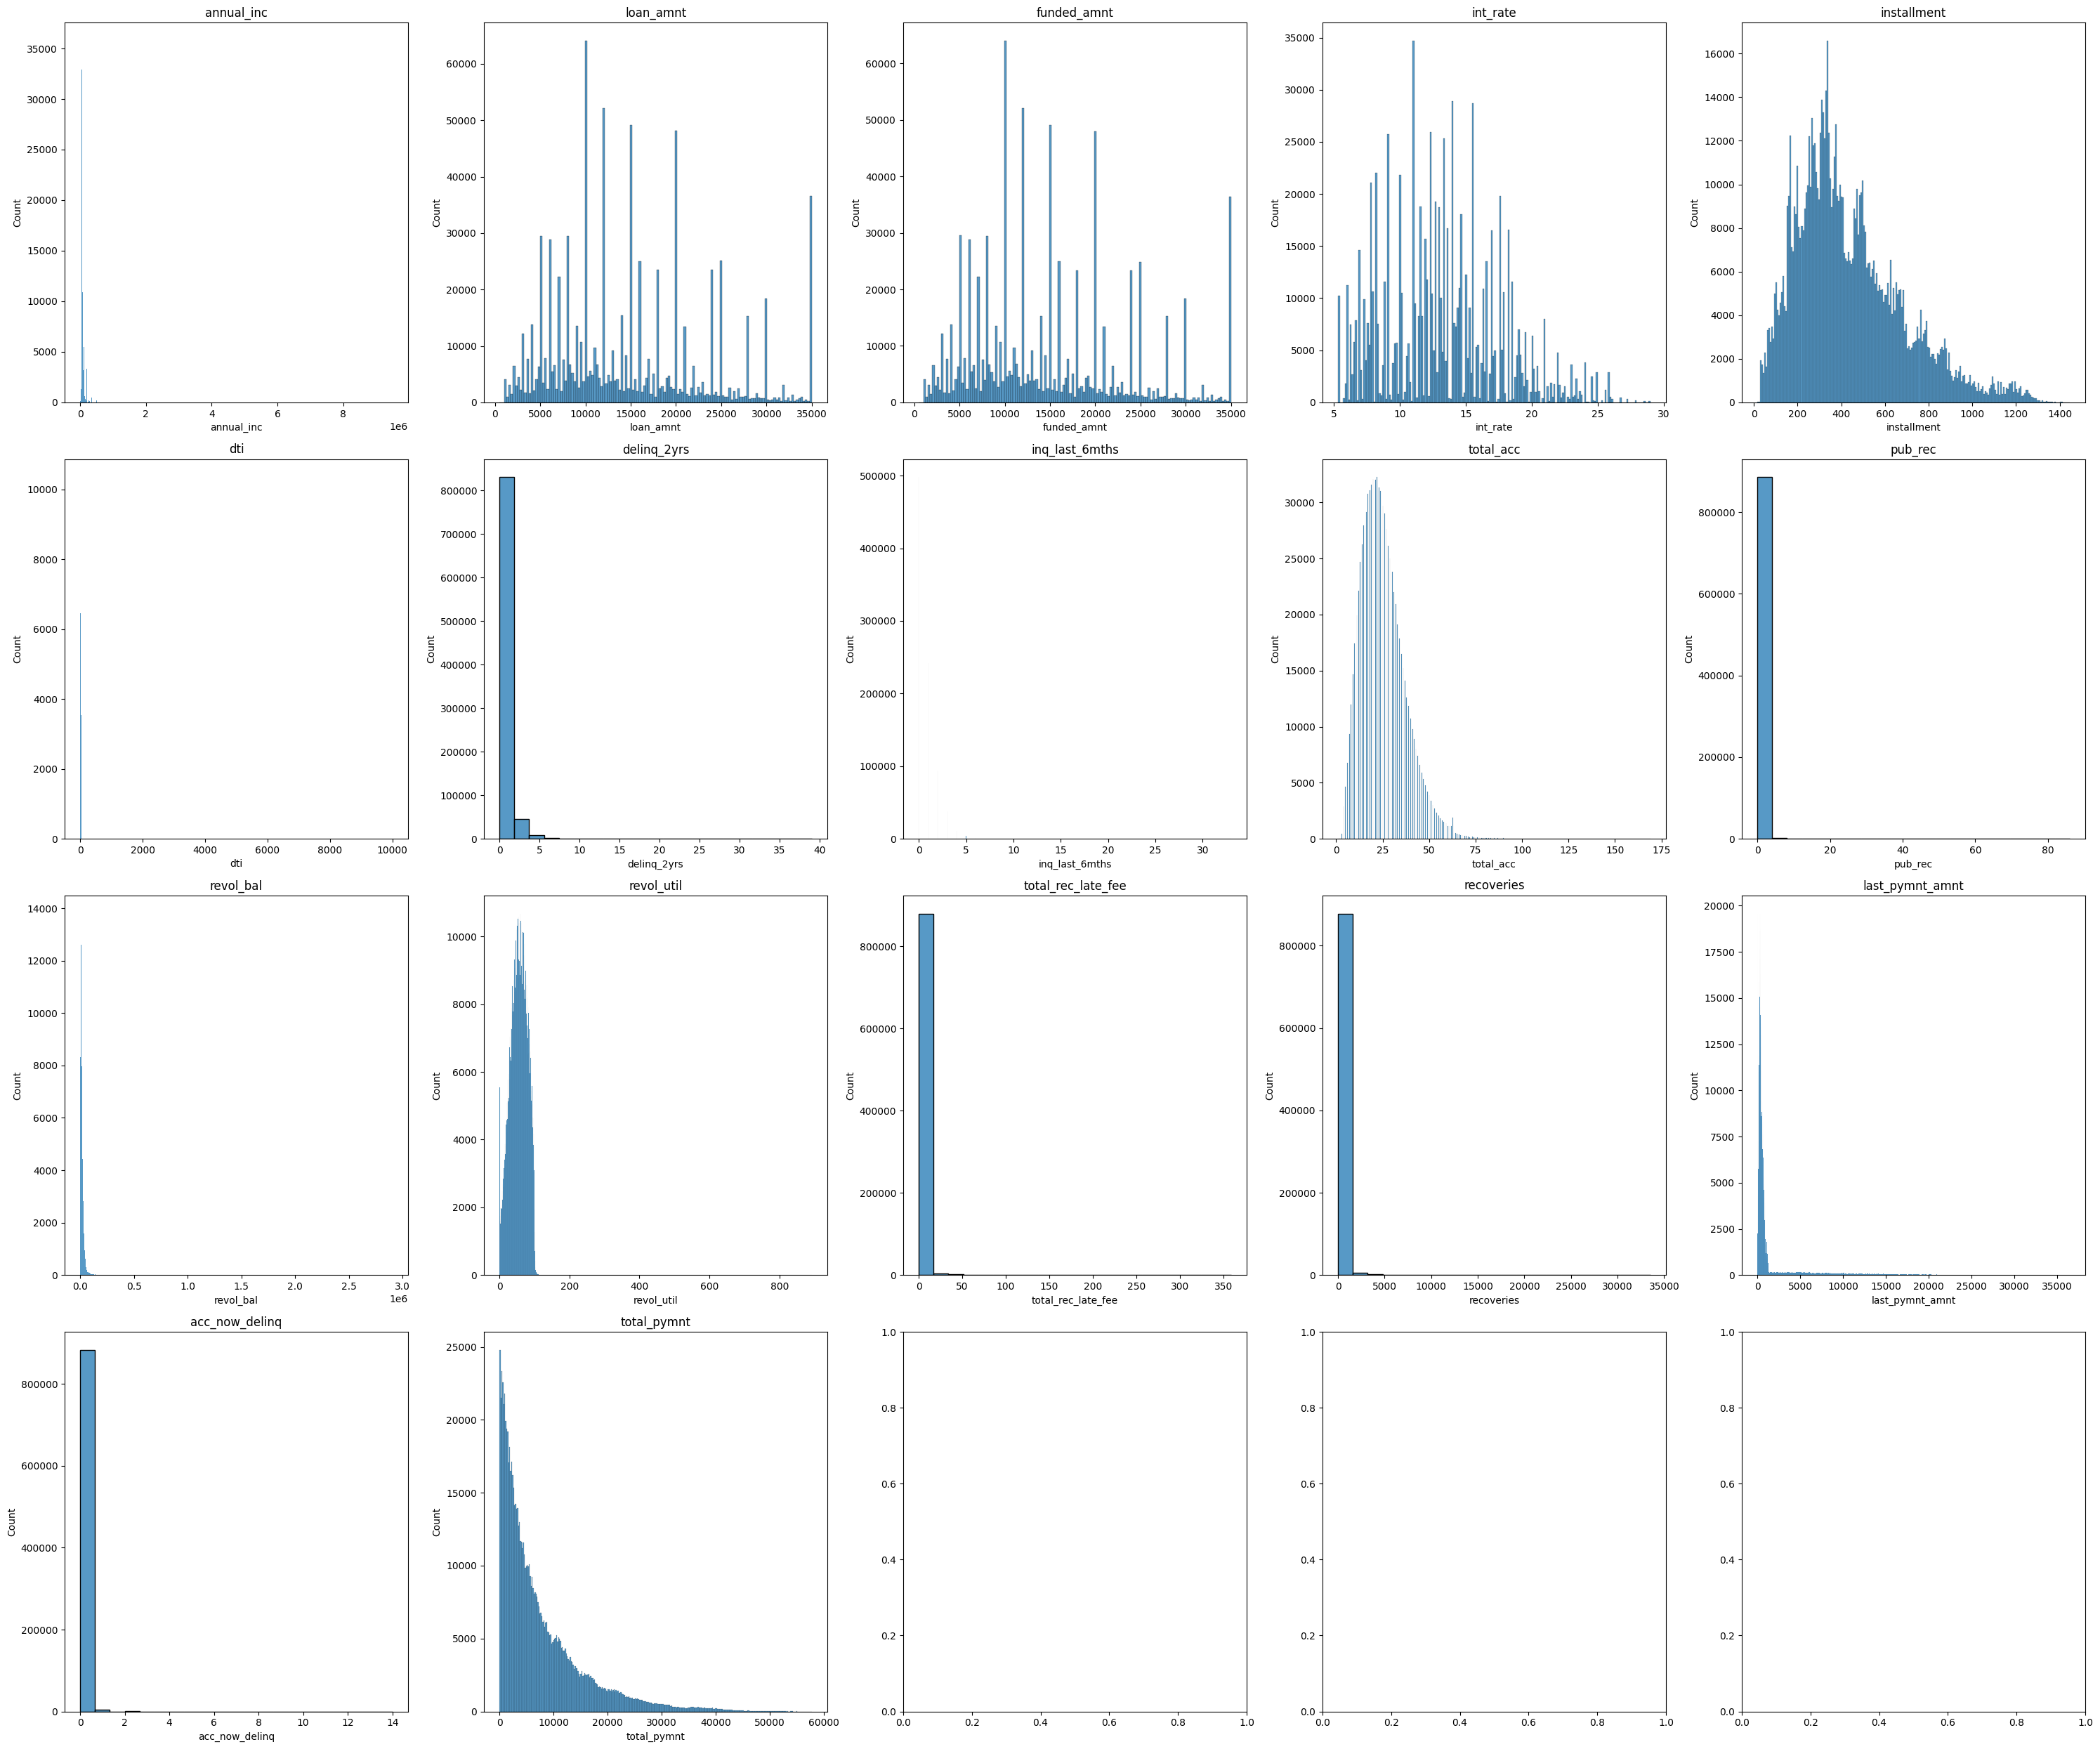

In [ ]:
# graphing
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30, 25))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Half the graphs appear to have some level of bias

### **3.2.2. Categorical variables**

Categorical variables are attributes that represent qualitative characteristics or discrete labels in a dataset. They cannot undergo arithmetic operations and require specific techniques to analyze their distribution and relationships.

In [ ]:
# categorical variables are selected
object_columns = df.select_dtypes(include='object' ).columns
print(object_columns)
len(object_columns)

Index(['grade', 'verification_status', 'term', 'sub_grade', 'emp_length',
       'home_ownership', 'loan_status', 'purpose'],
      dtype='object')


8

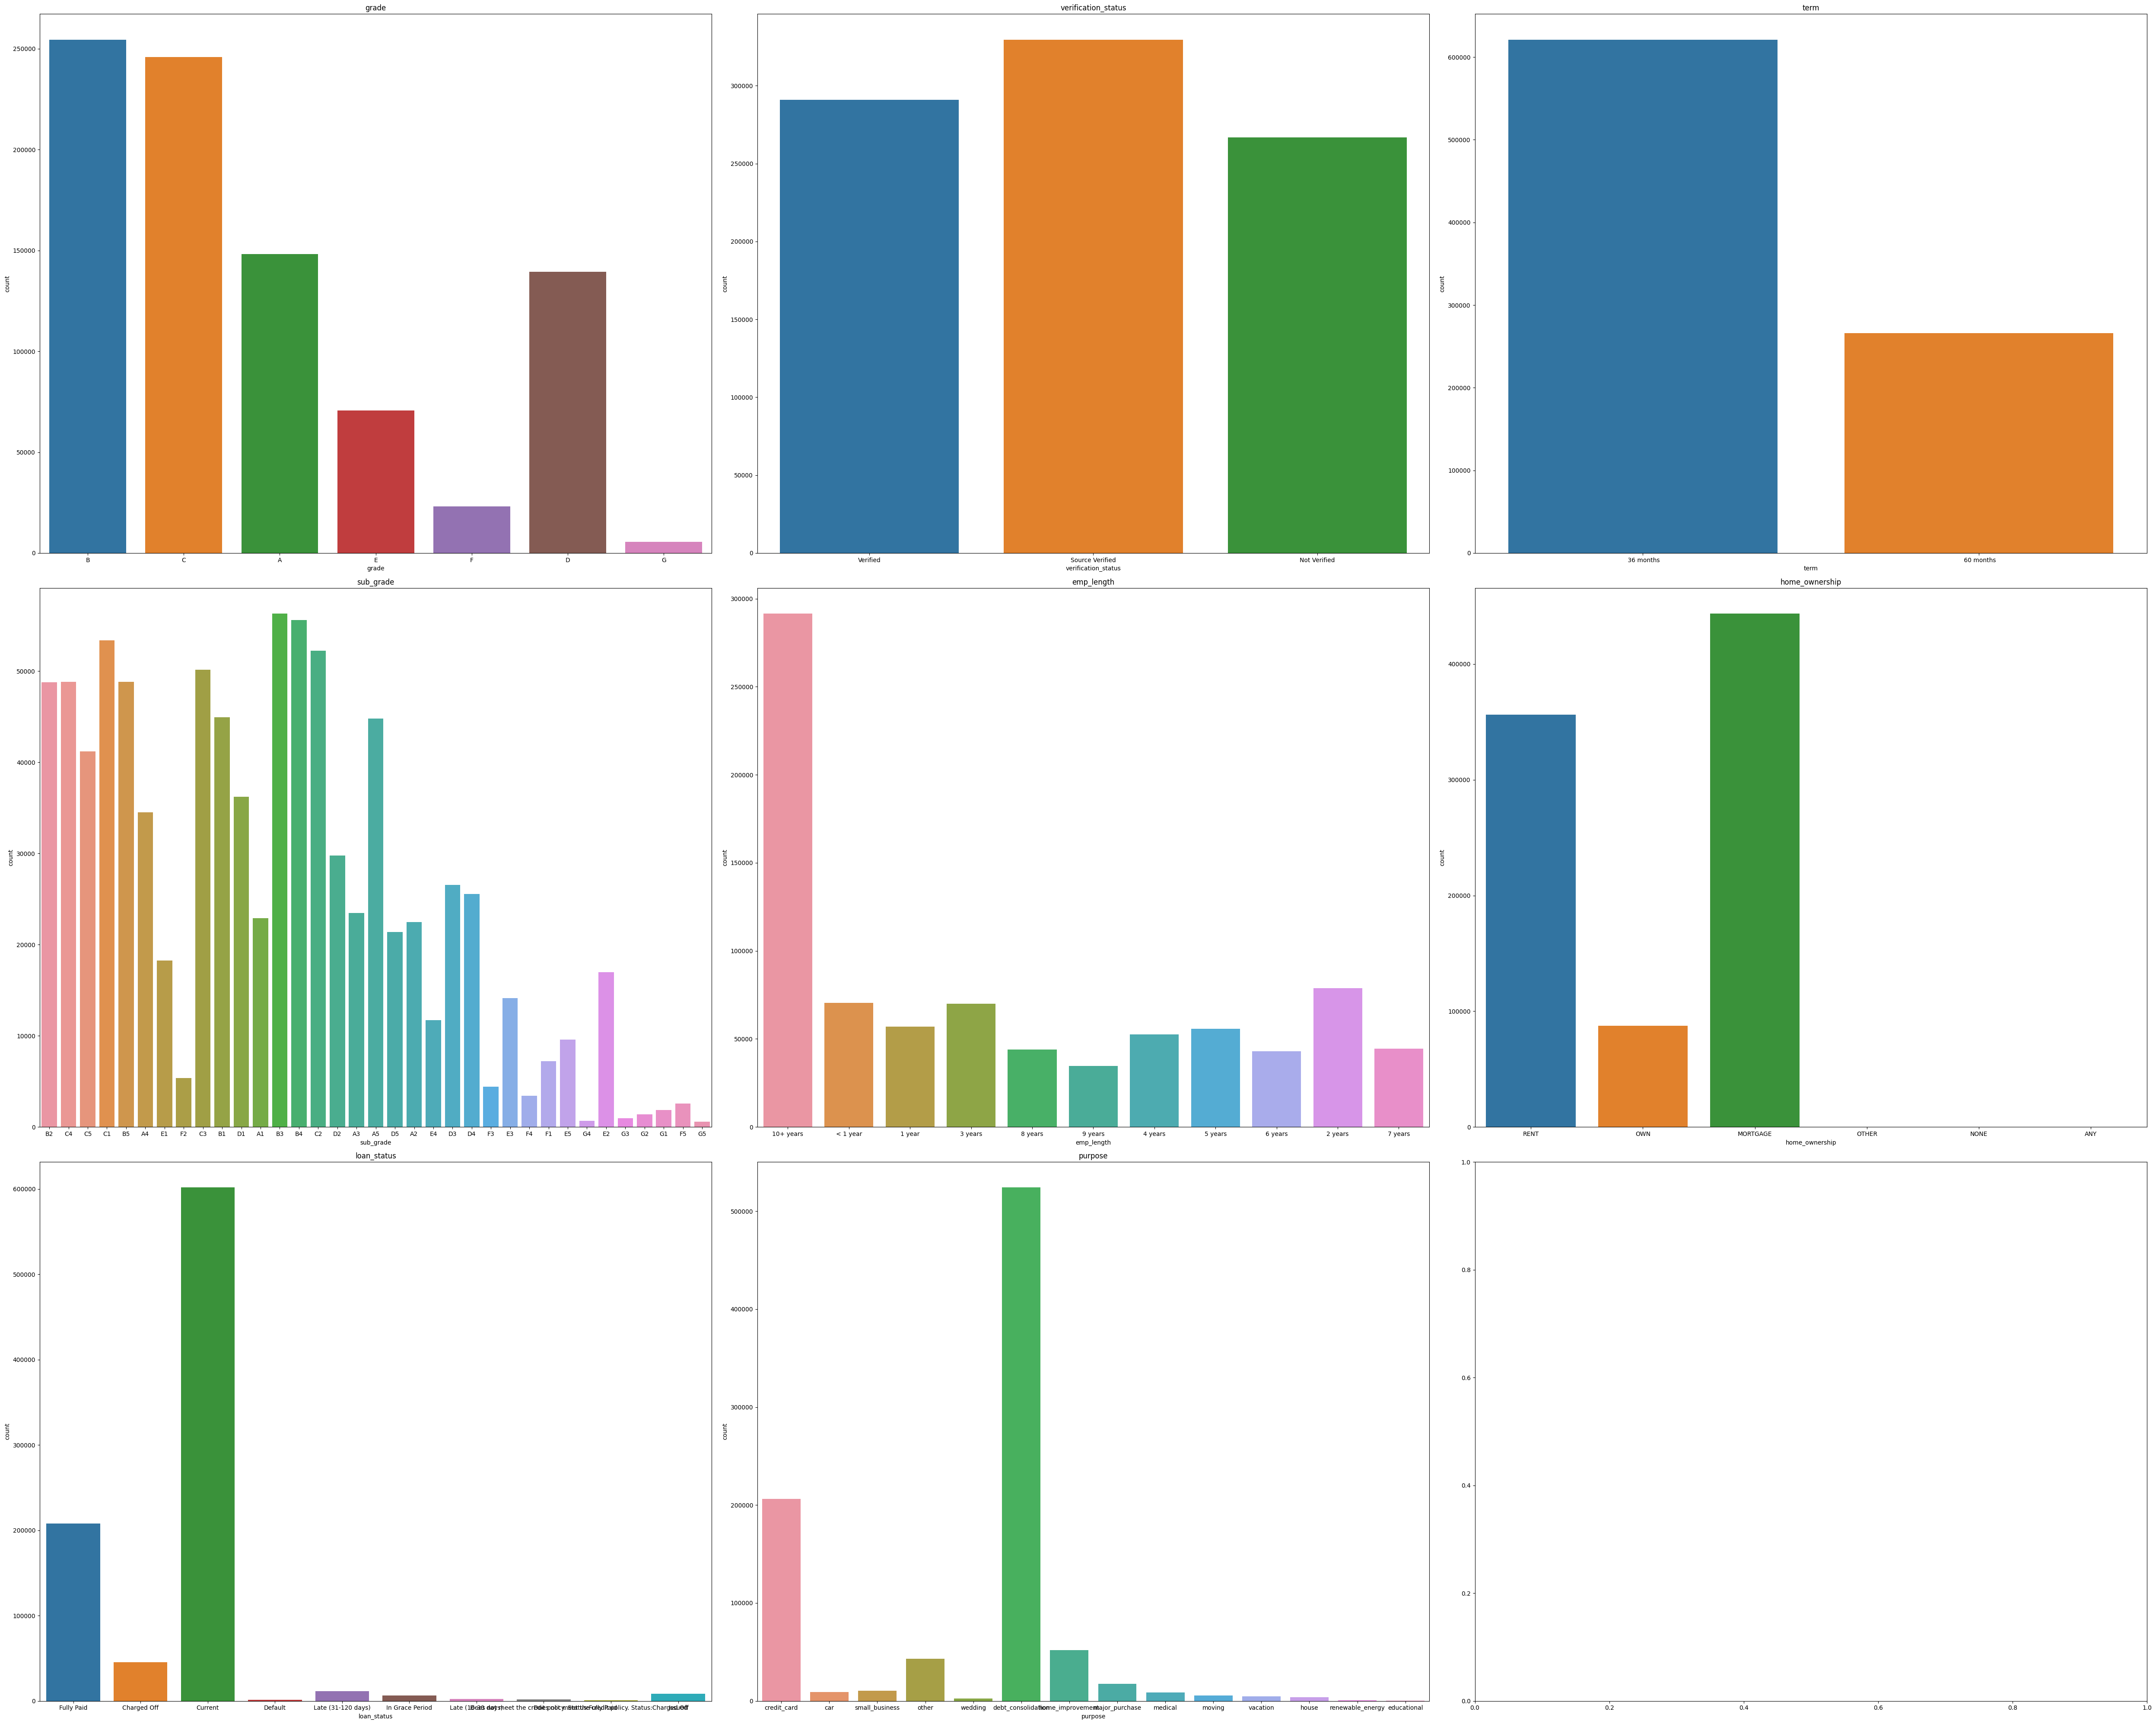

In [ ]:
# graphing
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(50, 40))
axs = axs.ravel()

for i, column in enumerate(object_columns):
    sns.countplot(x=column, data=df, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

The graphs show a good distribution

## **3.3. Bivariate analysis**

Study of the relationship between two variables in a data set. The goal is to understand how they are related and how one variable affects the other.

Correlation Matrix: Useful tool for analyzing the linear relationship between numerical variables and understanding how they affect each other.

<Axes: >

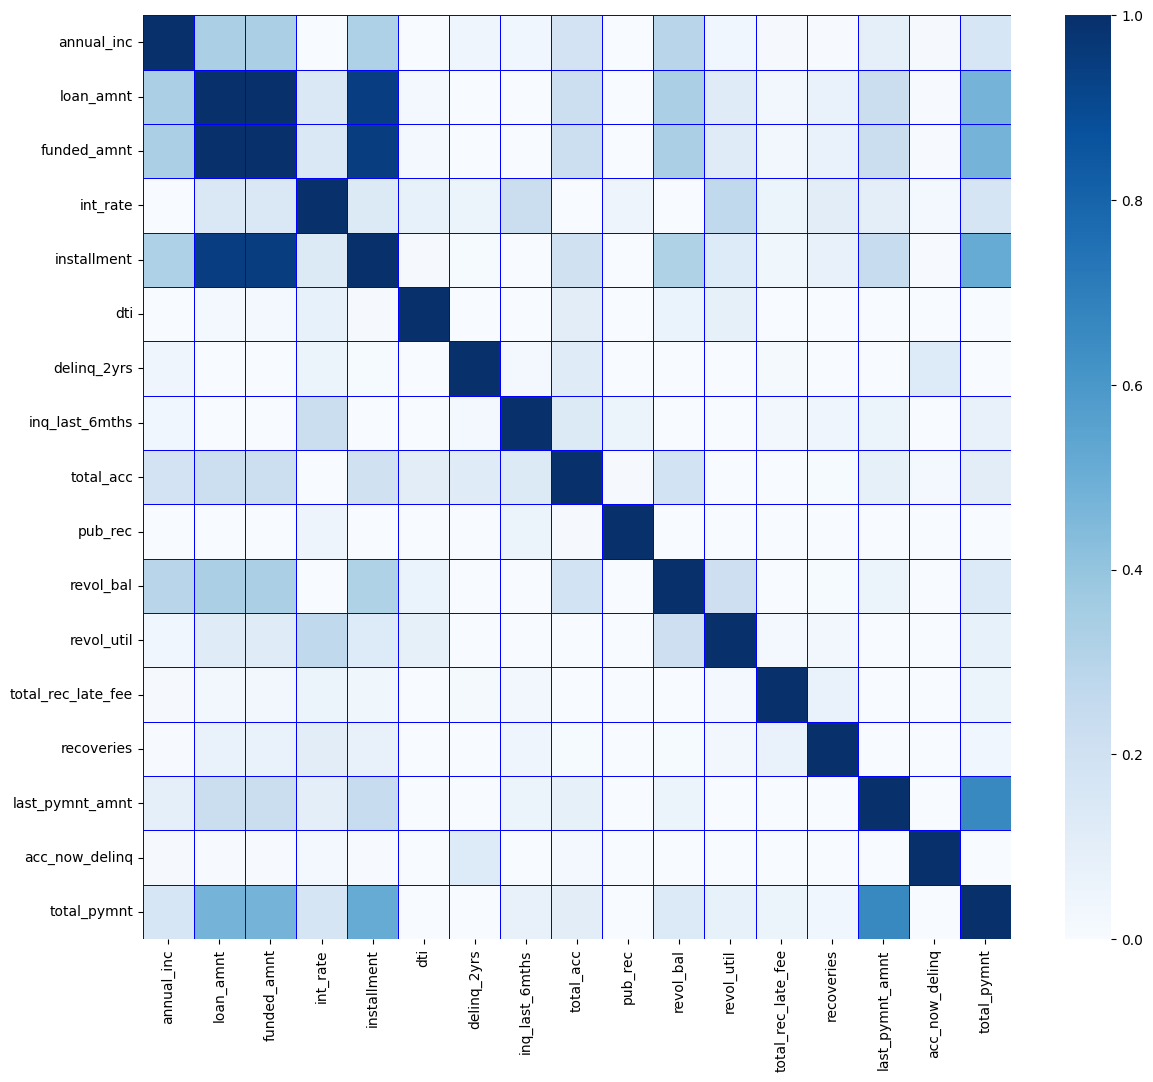

In [ ]:
plt.figure(figsize=(14,12))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, linewidth=0.5, linecolor="blue", cmap='Blues', vmin=0)

It is very likely that they will be deleted "founded" and "installament".

# <font color="#000080B">**4. Data preprocessing**</font>

---



Set of techniques applied to data before it is used in a machine learning model, with the goal of improving the quality and readiness of the data for analysis and modeling.

## **4.1. Removing redundant variables**

Redundant variables do not contribute significantly to the predictive power of a model and can even introduce noise or overfitting.

### **4.1.1. Missing values**

In [ ]:
print('missing columns values: ', missing_values.shape[0])
missing_values

missing columns values:  8


,0,percent %,dtype
emp_length,44825,5.051393,object
revol_util,502,0.056571,float64
delinq_2yrs,29,0.003268,float64
acc_now_delinq,29,0.003268,float64
pub_rec,29,0.003268,float64
total_acc,29,0.003268,float64
inq_last_6mths,29,0.003268,float64
annual_inc,4,0.000451,float64


There are no more than 15% missing values so nothing is removed.

### **4.1.2. Multicollinearity**

In [ ]:
high_corr_cols = []
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            high_corr_cols.append(colname)

high_corr_cols

['funded_amnt', 'installment', 'installment']

In [ ]:
df = df.drop(high_corr_cols, axis=1)

### **4.1.3. Skewed**

Skewed variables are those with an unbalanced distribution in the data. This can cause problems in class prediction, as the model can be biased towards the dominant class.

In [ ]:
skewed = pd.DataFrame()
rows = []

for column in df.columns:
  new_row = {
      'index': column,
      'count': len(df[column].value_counts(normalize=True)),
      'max_normalize': df[column].value_counts(normalize=True).max(),
      'values': list(df[column].value_counts(normalize=True).sort_values(ascending=False).index)
  }
  rows.append(new_row)

skewed = pd.concat([skewed, pd.DataFrame(rows)], ignore_index=True)
skewed = skewed.sort_values(by='max_normalize', ascending=False).set_index('index')
skewed[skewed['max_normalize'] > 0.9]

,count,max_normalize,values
index,,,
acc_now_delinq,8,0.995364,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 14.0]"
total_rec_late_fee,6181,0.985894,"[0.0, 15.0, 30.0, 45.0, 60.0, 16.84, 16.37, 17..."
recoveries,23055,0.972191,"[0.0, 200.0, 14.28, 10.0, 11.7, 10.4, 100.0, 8..."


In [ ]:
df = df.drop(skewed[skewed['max_normalize'] > 0.9].index, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   grade                887379 non-null  object 
 1   verification_status  887379 non-null  object 
 2   annual_inc           887375 non-null  float64
 3   loan_amnt            887379 non-null  float64
 4   term                 887379 non-null  object 
 5   int_rate             887379 non-null  float64
 6   sub_grade            887379 non-null  object 
 7   emp_length           842554 non-null  object 
 8   home_ownership       887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
 11  dti                  887379 non-null  float64
 12  delinq_2yrs          887350 non-null  float64
 13  inq_last_6mths       887350 non-null  float64
 14  total_acc            887350 non-null  float64
 15  pub_rec          

## **4.2. Filling missing values**

### **4.2.1. Numeric**

In [ ]:
numbers_cols = list(df.select_dtypes(exclude='object').columns)
missing_numbers = df[numbers_cols].isnull().sum()
missing_numbers[ missing_numbers > 0 ]

annual_inc          4
delinq_2yrs        29
inq_last_6mths     29
total_acc          29
pub_rec            29
revol_util        502
dtype: int64

In [ ]:
df[missing_numbers[ missing_numbers > 0 ].index].describe()

,annual_inc,delinq_2yrs,inq_last_6mths,total_acc,pub_rec,revol_util
count,8.873750e+05,887350.000000,887350.000000,887350.000000,887350.000000,886877.000000
mean,7.502759e+04,0.314442,0.694623,25.268026,0.195307,55.067693
std,6.469830e+04,0.862244,0.998448,11.840561,0.582091,23.834344
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.500000e+04,0.000000,0.000000,17.000000,0.000000,37.700000
50%,6.500000e+04,0.000000,0.000000,24.000000,0.000000,56.000000
75%,9.000000e+04,0.000000,1.000000,32.000000,0.000000,73.600000
max,9.500000e+06,39.000000,33.000000,169.000000,86.000000,892.300000


In [ ]:
columns_to_fill = missing_numbers[ missing_numbers > 0 ].index
medians = df[columns_to_fill].mean()
medians

annual_inc        75027.587761
delinq_2yrs           0.314442
inq_last_6mths        0.694623
total_acc            25.268026
pub_rec               0.195307
revol_util           55.067693
dtype: float64

In [ ]:
df[columns_to_fill]

,annual_inc,delinq_2yrs,inq_last_6mths,total_acc,pub_rec,revol_util
0,24000.0,0.0,1.0,9.0,0.0,83.7
1,30000.0,0.0,5.0,4.0,0.0,9.4
2,12252.0,0.0,2.0,10.0,0.0,98.5
3,49200.0,0.0,1.0,37.0,0.0,21.0
4,80000.0,0.0,0.0,38.0,0.0,53.9
...,...,...,...,...,...,...
887374,31000.0,0.0,0.0,15.0,1.0,82.1
887375,79000.0,0.0,1.0,23.0,0.0,84.5
887376,35000.0,0.0,0.0,22.0,1.0,61.3
887377,64400.0,1.0,2.0,20.0,0.0,30.6


In [ ]:
df[columns_to_fill] = df[columns_to_fill].fillna(medians)

In [ ]:
numbers_cols = list(df.select_dtypes(exclude='object').columns)
missing_numbers = df[numbers_cols].isnull().sum()
missing_numbers[ missing_numbers > 0 ]

Series([], dtype: int64)

In [ ]:
df[columns_to_fill]

,annual_inc,delinq_2yrs,inq_last_6mths,total_acc,pub_rec,revol_util
0,24000.0,0.0,1.0,9.0,0.0,83.7
1,30000.0,0.0,5.0,4.0,0.0,9.4
2,12252.0,0.0,2.0,10.0,0.0,98.5
3,49200.0,0.0,1.0,37.0,0.0,21.0
4,80000.0,0.0,0.0,38.0,0.0,53.9
...,...,...,...,...,...,...
887374,31000.0,0.0,0.0,15.0,1.0,82.1
887375,79000.0,0.0,1.0,23.0,0.0,84.5
887376,35000.0,0.0,0.0,22.0,1.0,61.3
887377,64400.0,1.0,2.0,20.0,0.0,30.6


### **4.2.2. Categorical**

In [ ]:
df['emp_length'] = df['emp_length'].fillna('NA')

## **4.3. Encoding categorical features**

Because the model requires numerical variables to carry out an adequate training, it is necessary to transform the numerical categorical variables.

### **4.3.1. Target variable**

In [ ]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', "Issued"])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df['loan_status'] = df['loan_status'].apply(classify_label)

### **4.3.2. Ordinal variables**

In [ ]:
# mapping
grade_CODE = {'A': 7, 'B': 6, 'C': 5, 'D': 4,'E': 3,'F': 2, 'G': 1, 'NA': 0}
verification_status_CODE = {'Verified': 3,'Source Verified': 2,'Not Verified': 1, 'NA': 0}
emp_length_CODE = {"< 1 year": 1, "1 year": 2, "2 years": 3, "3 years": 4, "4 years": 5, "5 years":6, "6 years": 7, "7 years": 8, "8 years": 9, "9 years": 10, "10+ years": 11, 'NA': 0}
home_ownership_CODE = {'OWN': 6, 'RENT': 5, 'MORTGAGE': 4, 'OTHER': 3,'NONE': 2, 'ANY': 1, 'NA': 0}

df['grade'] = df['grade'].map(grade_CODE)
df['verification_status'] = df['verification_status'].map(verification_status_CODE)
df['emp_length'] = df['emp_length'].map(emp_length_CODE)
df['home_ownership'] = df['home_ownership'].map(home_ownership_CODE)


In [ ]:
df['sub_grade'] = pd.factorize(df['sub_grade'])[0]
df['term'] = pd.factorize(df['term'])[0]

### **4.3.3. Non-ordinal variables**

One-hot encoding is a technique used to represent categorical variables as binary variables. It involves creating new binary columns for each category, where an observation has a value of 1 in the column corresponding to its category and 0 in the other columns. This technique is used to convert categorical variables into a numeric format that machine learning algorithms can interpret.

In [ ]:
# one-hot encoding other categorical variables and drop date columns
df = pd.get_dummies(df, columns=['purpose',], drop_first=True)

# <font color="#000080B">**5. Modeling**</font>

---



Process of building a statistical or mathematical model that captures the underlying relationships and patterns in data. Modeling involves selecting an appropriate machine learning algorithm or technique, tuning model parameters, and training the model using training data so that it can make predictions or decisions on new or previously unseen data.

## **5.1. Dataset preparation**

In [ ]:
# division of the input and response variables, as well as the training sets
y = df.pop('loan_status')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

## **5.2. Training and validation**

In [ ]:
# training
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [ ]:
# validation
xgb_model.score(X_test, y_test)

0.9460490432509184

# <font color="#000080B">**6. Interpretation of results**</font>

---



## **6.1. Metric evaluation**

In [ ]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    162173
           1       0.92      0.41      0.57     15303

    accuracy                           0.95    177476
   macro avg       0.93      0.70      0.77    177476
weighted avg       0.94      0.95      0.94    177476



The model presents a pressure greater than 90% in the test data.

## **6.2. ROC curve**

 With a ROC curve, you're trying to find a good model that optimizes the trade off between the False Positive Rate (FPR) and True Positive Rate (TPR). What counts here is how much area is under the curve (Area under the Curve = AuC). The ideal curve in the left image fills in 100%, which means that you're going to be able to distinguish between negative results and positive results 100% of the time (which is almost impossible in real life). The further you go to the right, the worse the detection. The ROC curve to the far right does a worse job than chance, mixing up the negatives and positives (which means you likely have an error in your setup).

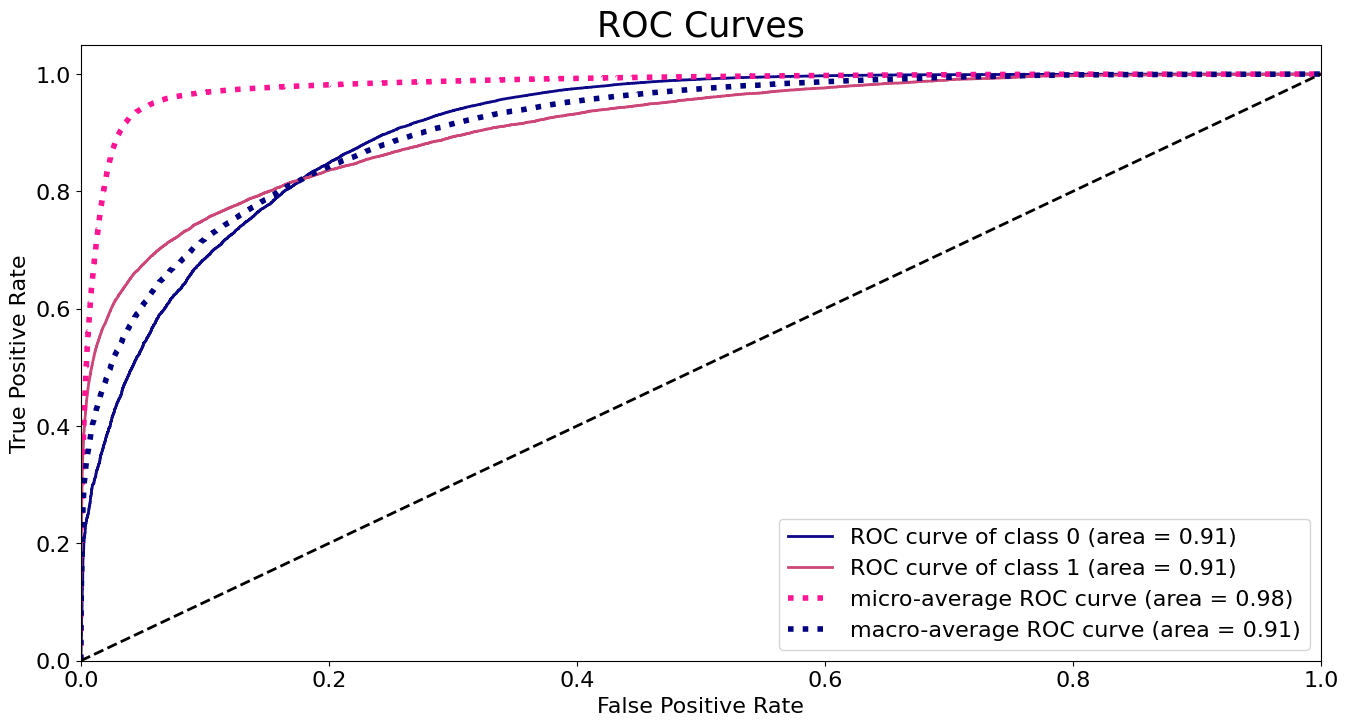

In [ ]:
# plotting ROC curves
y_true = y_test
y_probas = xgb_model.predict_proba(X_test)

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

## **6.3. Important Features**

Importance of the features used to make the predictions.

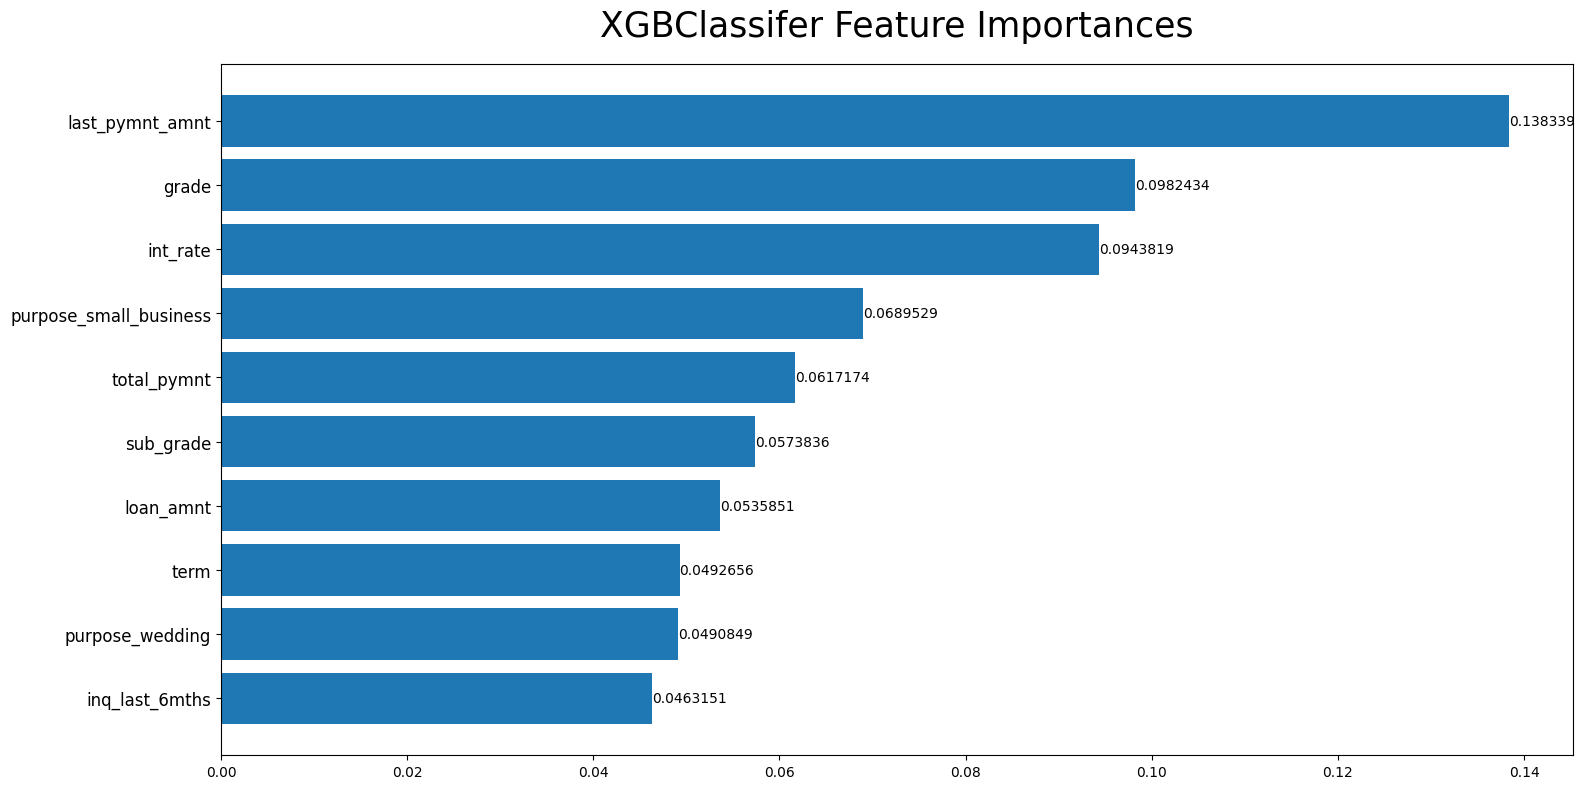

In [ ]:
# plotting the important features

req_cols = df.columns
features_to_plot = 10

importances = xgb_model.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(req_cols)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_ticks, values,)
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks)
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='black')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()

"last_pymnt_amnt", "grade" and "int_rate" are the variables with the greatest impact on the prediction of the model.